In [404]:
import pandas as pd
import numpy as np

In [405]:
# Import attributes file.
attributes = pd.read_csv('/Users/davidlichacz/home-depot/attributes.csv')

In [406]:
# Explore attributes dataframe.
attributes.shape

(2044803, 3)

In [407]:
attributes.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2044803 entries, 0 to 2044802
Data columns (total 3 columns):
product_uid    2044648 non-null float64
name           2044648 non-null object
value          2042713 non-null object
dtypes: float64(1), object(2)
memory usage: 46.8+ MB


Question: Why did I need to include the null_counts argument to get the null information?  It was not needed for the dataframes below.

In [408]:
attributes.head()

,product_uid,name,value
0,100001.0,Bullet01,Versatile connector for various 90° connection...
1,100001.0,Bullet02,Stronger than angled nailing or screw fastenin...
2,100001.0,Bullet03,Help ensure joints are consistently straight a...
3,100001.0,Bullet04,Dimensions: 3 in. x 3 in. x 1-1/2 in.
4,100001.0,Bullet05,Made from 12-Gauge steel


In [409]:
attributes.tail()

,product_uid,name,value
2044798,224428.0,Pilot Bit Included,No
2044799,224428.0,Power Tool Product Type,Drill & Router Bits
2044800,224428.0,Shank Diameter,3/8 in
2044801,224428.0,Shank Style,Hex
2044802,224428.0,Tools Product Type,Power Tool


In [410]:
# There are 155 missing values in the product_uid & name columns and 2090 missing values in the value columns.
# Removing rows that are all null eliminates all the missing values for product_uid & name.

attributes = attributes.dropna(how='all')
attributes.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2044648 entries, 0 to 2044802
Data columns (total 3 columns):
product_uid    2044648 non-null float64
name           2044648 non-null object
value          2042713 non-null object
dtypes: float64(1), object(2)
memory usage: 62.4+ MB


In [411]:
# Looking at the missing values for the value column, it seems like the lack of information may be information in itself.
# for example, no battery size might mean no battery is required.
attributes[attributes['value'].isnull()].head(20)

,product_uid,name,value
1022,100044.0,Collection Name,NaN
1349,100058.0,Battery Size,NaN
5909,100248.0,Fastener Thread Type,NaN
6367,100266.0,Drive Style,NaN
8823,100372.0,Collection Name,NaN
9131,100386.0,Battery Type Required,NaN
9589,100403.0,Exact Dry SCOF Rating,NaN
9590,100403.0,Exact Wet SCOF Rating,NaN
9595,100403.0,Mosaic Sub Unit Length (in.),NaN
9596,100403.0,Mosaic Sub Unit Width (in.),NaN


In [412]:
# Replace NaN values with "None" for now.
attributes['value'] = attributes['value'].fillna('None')

In [413]:
# The product_uid column is read in as a float, but should really be a string.  The format for the id
# appears to be six numerical digits.  Check to see if this is true.
import re

pattern = re.compile('[0-9]{6}\.0$')
id_check = attributes['product_uid'].astype(str).apply(pattern.match)
id_check.astype(bool).all()

True

In [414]:
# Since all elements of the product_uid column are of the format 6 digits followed by a decimal point and a zero,
# we can convert to a string and trim the last two characters.
attributes['product_uid'] = attributes['product_uid'].astype(str).str[:-2]

In [415]:
attributes.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2044648 entries, 0 to 2044802
Data columns (total 3 columns):
product_uid    2044648 non-null object
name           2044648 non-null object
value          2044648 non-null object
dtypes: object(3)
memory usage: 62.4+ MB


In [416]:
attributes.head()

,product_uid,name,value
0,100001,Bullet01,Versatile connector for various 90° connection...
1,100001,Bullet02,Stronger than angled nailing or screw fastenin...
2,100001,Bullet03,Help ensure joints are consistently straight a...
3,100001,Bullet04,Dimensions: 3 in. x 3 in. x 1-1/2 in.
4,100001,Bullet05,Made from 12-Gauge steel


In [417]:
# Import descriptions file.
descriptions = pd.read_csv('/Users/davidlichacz/home-depot/product_descriptions.csv')

In [418]:
# Explore descriptions dataframe.
descriptions.shape

(124428, 2)

In [419]:
descriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124428 entries, 0 to 124427
Data columns (total 2 columns):
product_uid            124428 non-null int64
product_description    124428 non-null object
dtypes: int64(1), object(1)
memory usage: 1.9+ MB


In [420]:
descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [421]:
# There are no null values in this dataframe.  This time the product_uid column imported as an integer so 
# we will perform a similar conversion as above.
pattern = re.compile('[0-9]{6}$')
id_check = descriptions['product_uid'].astype(str).apply(pattern.match)
id_check.astype(bool).all()

True

In [422]:
# All product_uid values are 6 digits, so convert to string.
descriptions['product_uid'] = descriptions['product_uid'].astype(str)

In [423]:
descriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124428 entries, 0 to 124427
Data columns (total 2 columns):
product_uid            124428 non-null object
product_description    124428 non-null object
dtypes: object(2)
memory usage: 1.9+ MB


In [424]:
# Import train file.
train = pd.read_csv('/Users/davidlichacz/home-depot/train.csv', encoding='latin-1')

In [425]:
# Explore train file.
train.shape

(74067, 5)

In [426]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74067 entries, 0 to 74066
Data columns (total 5 columns):
id               74067 non-null int64
product_uid      74067 non-null int64
product_title    74067 non-null object
search_term      74067 non-null object
relevance        74067 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.8+ MB


In [427]:
train.head()

,id,product_uid,product_title,search_term,relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67


In [428]:
# There are no missing values in the train dataframe.  Like before the product_uid column needs to be 
# converted to a string.
pattern = re.compile('[0-9]{6}$')
id_check = train['product_uid'].astype(str).apply(pattern.match)
id_check.astype(bool).all()

True

In [429]:
train['product_uid'] = train['product_uid'].astype(str)

In [430]:
train.head()

,id,product_uid,product_title,search_term,relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67


In [431]:
# The relevance scores are an average of score given between 1 and 3, therefore the relevance score should be a
# float between 1 and 3.  Let's test this.
train['relevance'].value_counts().sort_index()

1.00     2105
1.25        4
1.33     3006
1.50        5
1.67     6780
1.75        9
2.00    11730
2.25       11
2.33    16060
2.50       19
2.67    15202
2.75       11
3.00    19125
Name: relevance, dtype: int64

In [432]:
# The values for relevance seem valid. Let's explore them further.
train['relevance'].describe()

count    74067.000000
mean         2.381634
std          0.533984
min          1.000000
25%          2.000000
50%          2.330000
75%          3.000000
max          3.000000
Name: relevance, dtype: float64

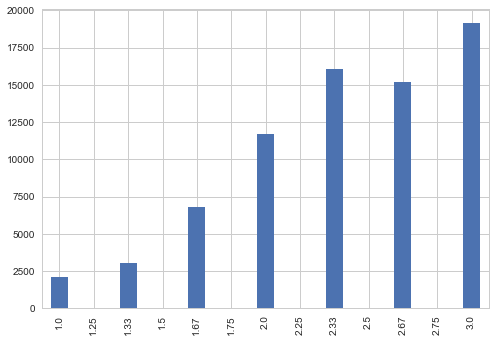

In [433]:
import matplotlib.pyplot as plt

relevance_sorted = train['relevance'].value_counts().sort_index()
relevance_sorted.plot(kind='bar')
plt.show()

It seems like the distribution of relevance scores trends to the higher end of the scale, so reviewers
are more likely to rank something as relevant.

In [434]:
# Import test file.
test = pd.read_csv('/Users/davidlichacz/home-depot/test.csv', encoding='latin-1')

In [435]:
# Explore test dataframe.
test.shape

(166693, 4)

In [436]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166693 entries, 0 to 166692
Data columns (total 4 columns):
id               166693 non-null int64
product_uid      166693 non-null int64
product_title    166693 non-null object
search_term      166693 non-null object
dtypes: int64(2), object(2)
memory usage: 5.1+ MB


In [437]:
test.head()

,id,product_uid,product_title,search_term
0,1,100001,Simpson Strong-Tie 12-Gauge Angle,90 degree bracket
1,4,100001,Simpson Strong-Tie 12-Gauge Angle,metal l brackets
2,5,100001,Simpson Strong-Tie 12-Gauge Angle,simpson sku able
3,6,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong ties
4,7,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong tie hcc668


In [438]:
# Naturally, the test set has the same structure as the training set, so the same methods can be performed.
pattern = re.compile('[0-9]{6}$')
id_check = test['product_uid'].astype(str).apply(pattern.match)
id_check.astype(bool).all()

True

In [439]:
test['product_uid'] = test['product_uid'].astype(str)

In [440]:
test.head()

,id,product_uid,product_title,search_term
0,1,100001,Simpson Strong-Tie 12-Gauge Angle,90 degree bracket
1,4,100001,Simpson Strong-Tie 12-Gauge Angle,metal l brackets
2,5,100001,Simpson Strong-Tie 12-Gauge Angle,simpson sku able
3,6,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong ties
4,7,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong tie hcc668


In [441]:
# The product_title column of test and train feel like they belong more with the descriptions data.
# This will also reduce duplication and the amount of data stored.
train_title = train[['product_uid', 'product_title']].drop_duplicates()
test_title = test[['product_uid', 'product_title']].drop_duplicates()
product_titles = pd.concat([train_title, test_title], axis=0).drop_duplicates().sort_values('product_uid')

In [442]:
# Add the product titles to the descriptions dataframe.
descriptions = pd.merge(descriptions, product_titles, on='product_uid', how='left')

In [443]:
descriptions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124603 entries, 0 to 124602
Data columns (total 3 columns):
product_uid            124603 non-null object
product_description    124603 non-null object
product_title          124603 non-null object
dtypes: object(3)
memory usage: 3.8+ MB


In [444]:
# This added a few rows to descriptions as there are a few products with some variation in the product title.
descriptions['product_uid'].value_counts().head(10)

182629    3
141602    2
144110    2
136763    2
155570    2
151176    2
170997    2
104518    2
101317    2
122095    2
Name: product_uid, dtype: int64

In [445]:
# Drop product titles from train and test sets.
train = train.drop('product_title', axis=1)
test = test.drop('product_title', axis=1)

In [446]:
# Merge into one dataframe.
search = train.merge(descriptions, on='product_uid', how='left')
attributes = attributes.groupby('product_uid').agg(' '.join)
search = search.merge(attributes, left_on='product_uid', right_index=True, how='left')

test_search = test.merge(descriptions, on='product_uid', how='left')
attributes = attributes.groupby('product_uid').agg(' '.join)
test_search = test_search.merge(attributes, left_on='product_uid', right_index=True, how='left')

In [447]:
search['name'].fillna('Null', inplace=True)
search['value'].fillna('Null', inplace=True)

test_search['name'].fillna('Null', inplace=True)
test_search['value'].fillna('Null', inplace=True)

In [448]:
search.search_term = search.search_term.replace('\s+', ' ', regex=True)

test_search.search_term = test_search.search_term.replace('\s+', ' ', regex=True)

In [449]:
def remove_punctuations(text):
    # Remove common punctuation from strings.
    for punctuation in [',' '?', '!', '\'']:
        text = text.replace(punctuation, '')
    # Remove periods but only if they follow a word. 
    text_list = list(text)
    locations = [i for i, x in enumerate(text_list) if x == '.']
    for location in locations:
        if location == 0:
            text_list[location] = ''
        if text_list[location-1].isalpha:
            text_list[location] = ''
    text = ''.join(text_list)
        
    return text

search['search_term'] = search['search_term'].apply(remove_punctuations)
search['product_description'] = search['product_description'].apply(remove_punctuations)
search['product_title'] = search['product_title'].apply(remove_punctuations)
search['value'] = search['value'].apply(remove_punctuations)

test_search['search_term'] = test_search['search_term'].apply(remove_punctuations)
test_search['product_description'] = test_search['product_description'].apply(remove_punctuations)
test_search['product_title'] = test_search['product_title'].apply(remove_punctuations)
test_search['value'] = test_search['value'].apply(remove_punctuations)

In [450]:
# Remove stop words
from nltk.corpus import stopwords
stop = set(stopwords.words('english')) 

search['search_term'] = search['search_term'].apply(lambda k: ' '.join([item for item in str.split(k) if item not in stop]))
search['product_description'] = search['product_description'].apply(lambda k: ' '.join([item for item in str.split(k) if item not in stop]))
search['product_title'] = search['product_title'].apply(lambda k: ' '.join([item for item in str.split(k) if item not in stop]))
search['value'] = search['value'].apply(lambda k: ' '.join([item for item in str.split(k) if item not in stop]))

test_search['search_term'] = test_search['search_term'].apply(lambda k: ' '.join([item for item in str.split(k) if item not in stop]))
test_search['product_description'] = test_search['product_description'].apply(lambda k: ' '.join([item for item in str.split(k) if item not in stop]))
test_search['product_title'] = test_search['product_title'].apply(lambda k: ' '.join([item for item in str.split(k) if item not in stop]))
test_search['value'] = test_search['value'].apply(lambda k: ' '.join([item for item in str.split(k) if item not in stop]))

In [451]:
# Use stemming to get the root of each word.
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

search['search_stem'] = search['search_term'].apply(stem_sentences)
search['desc_stem'] = search['product_description'].apply(stem_sentences)
search['title_stem'] = search['product_title'].apply(stem_sentences)
search['att_stem'] = search['value'].apply(stem_sentences)

test_search['search_stem'] = test_search['search_term'].apply(stem_sentences)
test_search['desc_stem'] = test_search['product_description'].apply(stem_sentences)
test_search['title_stem'] = test_search['product_title'].apply(stem_sentences)
test_search['att_stem'] = test_search['value'].apply(stem_sentences)

In [452]:
# Calculate the percentage of words in the search term that appears in the other text fields.
def search_pct(row, string1, string2):
    if row[string2] == 'Null':
        return 0
    else:
        str1 = row[string1].lower()
        str2 = row[string2].lower()
        count = 0

        str1_split = str1.split(' ')
        str2_split = str2.split(' ')
        for word in str1_split:
            if word in str2:
                count += 1
        return count / len(str1_split)
    

search['desc_pct'] = search.apply(search_pct, axis=1, args=('search_stem', 'desc_stem'))
search['title_pct'] = search.apply(search_pct, axis=1, args=('search_stem', 'title_stem'))
search['att_pct'] = search.apply(search_pct, axis=1, args=('search_stem', 'att_stem'))

test_search['desc_pct'] = test_search.apply(search_pct, axis=1, args=('search_stem', 'desc_stem'))
test_search['title_pct'] = test_search.apply(search_pct, axis=1, args=('search_stem', 'title_stem'))
test_search['att_pct'] = test_search.apply(search_pct, axis=1, args=('search_stem', 'att_stem'))

In [453]:
# Calculate the percentage of words in text fields that also appear in the search term.
def product_pct(row, string1, string2):
    if row[string2] == 'Null':
        return 0
    else:
        str1 = row[string1].lower()
        str2 = row[string2].lower()
        count = 0

        str1_split = str1.split(' ')
        str2_split = str2.split(' ')
        for word in str1_split:
            if word in str2:
                count += 1
        return count / len(str2_split)
    

search['desc_pct_prod'] = search.apply(product_pct, axis=1, args=('search_stem', 'desc_stem'))
search['title_pct_prod'] = search.apply(product_pct, axis=1, args=('search_stem', 'title_stem'))
search['att_pct_prod'] = search.apply(product_pct, axis=1, args=('search_stem', 'att_stem'))

test_search['desc_pct_prod'] = test_search.apply(product_pct, axis=1, args=('search_stem', 'desc_stem'))
test_search['title_pct_prod'] = test_search.apply(product_pct, axis=1, args=('search_stem', 'title_stem'))
test_search['att_pct_prod'] = test_search.apply(product_pct, axis=1, args=('search_stem', 'att_stem'))

In [454]:
# Create a boolean field that is 1 if the entire search term phrase appears in a text field and zero if it does not.
def contains_phrase(row, string1, string2):
    if row[string2] == 'Null':
        return 0
    else:
        str1 = row[string1].lower()
        str2 = row[string2].lower()

        if str1 in str2:
            return 1
        else:
            return 0
    

search['desc_phrase'] = search.apply(contains_phrase, axis=1, args=('search_stem', 'desc_stem'))
search['title_phrase'] = search.apply(contains_phrase, axis=1, args=('search_stem', 'title_stem'))
search['att_phrase'] = search.apply(contains_phrase, axis=1, args=('search_stem', 'att_stem'))

test_search['desc_phrase'] = test_search.apply(contains_phrase, axis=1, args=('search_stem', 'desc_stem'))
test_search['title_phrase'] = test_search.apply(contains_phrase, axis=1, args=('search_stem', 'title_stem'))
test_search['att_phrase'] = test_search.apply(contains_phrase, axis=1, args=('search_stem', 'att_stem'))

In [455]:
# Calculate average number of times a word from the search term appears in a text field.
def search_avg(row, string1, string2):
    if row[string2] == 'Null':
        return 0
    else:
        str1 = row[string1].lower()
        str2 = row[string2].lower()
        count = []

        str1_split = str1.split(' ')
        str2_split = str2.split(' ')
        for word in str1_split:
            count.append(str2_split.count(word))
        return sum(count) / len(count)
    
search['desc_avg'] = search.apply(search_avg, axis=1, args=('search_stem', 'desc_stem'))
search['title_avg'] = search.apply(search_avg, axis=1, args=('search_stem', 'title_stem'))
search['att_avg'] = search.apply(search_avg, axis=1, args=('search_stem', 'att_stem'))

test_search['desc_avg'] = test_search.apply(search_avg, axis=1, args=('search_stem', 'desc_stem'))
test_search['title_avg'] = test_search.apply(search_avg, axis=1, args=('search_stem', 'title_stem'))
test_search['att_avg'] = test_search.apply(search_avg, axis=1, args=('search_stem', 'att_stem'))

In [456]:
# Calculate total number of times a word from the search term appears in a text field.
def search_total(row, string1, string2):
    if row[string2] == 'Null':
        return 0
    else:
        str1 = row[string1].lower()
        str2 = row[string2].lower()
        count = []

        str1_split = str1.split(' ')
        str2_split = str2.split(' ')
        for word in str1_split:
            count.append(str2_split.count(word))
        return sum(count)
    
search['desc_total'] = search.apply(search_total, axis=1, args=('search_stem', 'desc_stem'))
search['title_total'] = search.apply(search_total, axis=1, args=('search_stem', 'title_stem'))
search['att_total'] = search.apply(search_total, axis=1, args=('search_stem', 'att_stem'))

test_search['desc_total'] = test_search.apply(search_total, axis=1, args=('search_stem', 'desc_stem'))
test_search['title_total'] = test_search.apply(search_total, axis=1, args=('search_stem', 'title_stem'))
test_search['att_total'] = test_search.apply(search_total, axis=1, args=('search_stem', 'att_stem'))

In [457]:
# Calculate maximum number of times a word from the search term appears in a text field.
def search_max(row, string1, string2):
    if row[string2] == 'Null':
        return 0
    else:
        str1 = row[string1].lower()
        str2 = row[string2].lower()
        count = []

        str1_split = str1.split(' ')
        str2_split = str2.split(' ')
        for word in str1_split:
            count.append(str2_split.count(word))
        return max(count)
    
search['desc_max'] = search.apply(search_max, axis=1, args=('search_stem', 'desc_stem'))
search['title_max'] = search.apply(search_max, axis=1, args=('search_stem', 'title_stem'))
search['att_max'] = search.apply(search_max, axis=1, args=('search_stem', 'att_stem'))

test_search['desc_max'] = test_search.apply(search_max, axis=1, args=('search_stem', 'desc_stem'))
test_search['title_max'] = test_search.apply(search_max, axis=1, args=('search_stem', 'title_stem'))
test_search['att_max'] = test_search.apply(search_max, axis=1, args=('search_stem', 'att_stem'))

In [458]:
# Calcuate the number of words in each text field.
search['search_split'] = search['search_term'].str.split().str.len()
search['title_split'] = search['product_title'].str.split().str.len()
search['desc_split'] = search['product_description'].str.split().str.len()

test_search['search_split'] = test_search['search_term'].str.split().str.len()
test_search['title_split'] = test_search['product_title'].str.split().str.len()
test_search['desc_split'] = test_search['product_description'].str.split().str.len()

In [459]:
# For visualization purposes, group rows together using the first digit of their relevance score.
search['relevance_reduced'] = search['relevance'].apply(np.floor)

In [460]:
search.head(10)

,id,product_uid,search_term,relevance,product_description,product_title,name,value,search_stem,desc_stem,...,desc_total,title_total,att_total,desc_max,title_max,att_max,search_split,title_split,desc_split,relevance_reduced
0,2,100001,angle bracket,3.00,"Not angles make joints stronger, also provide ...",Simpson Strong-Tie 12-Gauge Angle,Bullet01 Bullet02 Bullet03 Bullet04 Bullet05 B...,Versatile connector various 90° connections ho...,angl bracket,"not angl make joint stronger, also provid cons...",...,3,1,1,3,1,1,2,4,86,3.0
1,3,100001,l bracket,2.50,"Not angles make joints stronger, also provide ...",Simpson Strong-Tie 12-Gauge Angle,Bullet01 Bullet02 Bullet03 Bullet04 Bullet05 B...,Versatile connector various 90° connections ho...,l bracket,"not angl make joint stronger, also provid cons...",...,0,0,0,0,0,0,2,4,86,2.0
2,9,100002,deck,3.00,BEHR Premium Textured DECKOVER innovative soli...,BEHR Premium Textured DeckOver 1-gal #SC-141 T...,Application Method Assembled Depth (in.) Assem...,"Brush,Roller,Spray 663 776 663 Revives wood co...",deck,behr premium textur deckov innov solid color c...,...,0,0,0,0,0,0,1,10,122,3.0
3,16,100005,rain shower head,2.33,Update bathroom Delta Vero Single-Handle Showe...,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,Bath Faucet Type Built-in Water Filter Bullet0...,"Combo Tub Shower No Includes trim kit only, ro...",rain shower head,updat bathroom delta vero single-handl shower ...,...,1,1,2,1,1,1,3,12,68,2.0
4,17,100005,shower faucet,2.67,Update bathroom Delta Vero Single-Handle Showe...,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,Bath Faucet Type Built-in Water Filter Bullet0...,"Combo Tub Shower No Includes trim kit only, ro...",shower faucet,updat bathroom delta vero single-handl shower ...,...,2,2,2,1,1,1,2,12,68,2.0
5,18,100006,convection otr,3.00,Achieving delicious results almost effortless ...,Whirlpool 19 cu ft Over Range Convection Micro...,Appliance Type Assembled Depth (in.) Assembled...,Over Range Microwave 185 1713 2994 Spacious 19...,convect otr,achiev delici result almost effortless whirlpo...,...,4,1,2,4,1,2,2,12,331,3.0
6,20,100006,microwave stove,2.67,Achieving delicious results almost effortless ...,Whirlpool 19 cu ft Over Range Convection Micro...,Appliance Type Assembled Depth (in.) Assembled...,Over Range Microwave 185 1713 2994 Spacious 19...,microwav stove,achiev delici result almost effortless whirlpo...,...,4,1,5,4,1,5,2,12,331,2.0
7,21,100006,microwaves,3.00,Achieving delicious results almost effortless ...,Whirlpool 19 cu ft Over Range Convection Micro...,Appliance Type Assembled Depth (in.) Assembled...,Over Range Microwave 185 1713 2994 Spacious 19...,microwav,achiev delici result almost effortless whirlpo...,...,4,1,5,4,1,5,1,12,331,3.0
8,23,100007,emergency light,2.67,The Quantum Adjustable 2-Light LED Black Emerg...,Lithonia Lighting Quantum 2-Light Black LED Em...,Battery Power Type Battery Size Bulb Type Incl...,Ni-Cad Built-In LED Advanced LED technology de...,emerg light,the quantum adjust 2-light led black emerg lig...,...,5,2,3,4,1,2,2,9,85,2.0
9,27,100009,mdf 3/4,3.00,Get House Fara 3/4 x 3 x 8 ft MDF Fluted Casin...,House Fara 3/4 x 3 x 8 ft MDF Fluted Casing,Application Bullet01 Bullet02 Bullet03 Bullet0...,Door & Window Made primed MDF Can painted matc...,mdf 3/4,get hous fara 3/4 x 3 x 8 ft mdf flute case ad...,...,2,2,1,1,1,1,2,11,53,3.0


In [461]:
# Save new dataframe for future use.
search.to_csv(r'search.csv')
test_search.to_csv(r'test.csv')

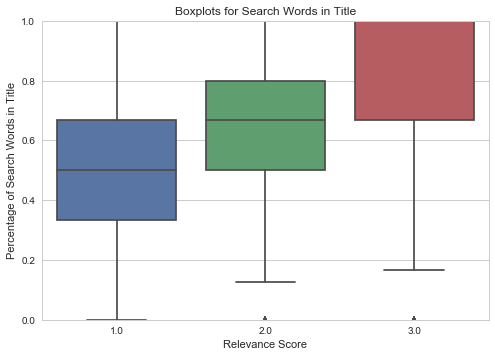

In [462]:
# Create boxplots to compare search field percentage for each text field.
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.boxplot(x="relevance_reduced", y="title_pct", data=search)
ax.set(ylim=(0, 1.0))
plt.title('Boxplots for Search Words in Title')
plt.xlabel('Relevance Score')
plt.ylabel('Percentage of Search Words in Title')
plt.show()

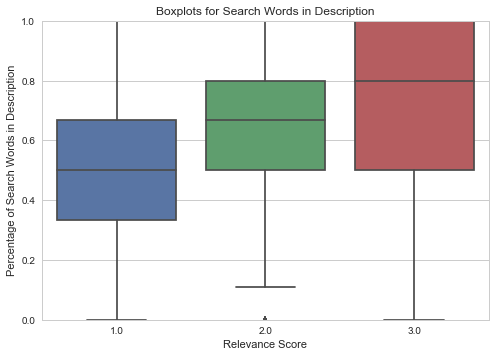

In [463]:
ax = sns.boxplot(x="relevance_reduced", y="desc_pct", data=search)
ax.set(ylim=(0, 1.0))
plt.title('Boxplots for Search Words in Description')
plt.xlabel('Relevance Score')
plt.ylabel('Percentage of Search Words in Description')
plt.show()

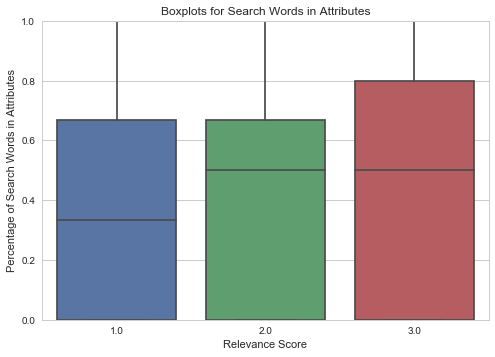

In [464]:
ax = sns.boxplot(x="relevance_reduced", y="att_pct", data=search)
ax.set(ylim=(0, 1.0))
plt.title('Boxplots for Search Words in Attributes')
plt.xlabel('Relevance Score')
plt.ylabel('Percentage of Search Words in Attributes')
plt.show()

The plots above show that there appears to be a relationship between the percentage of search words that appear in the product title and the relevance score as the median percentage increases throughout the three categories.  A similar trend appears to be evident with the percentage of search words that appear in the product description.  However, the product attributes do not appear to show a strong correlation as the three box plots are quite similar.

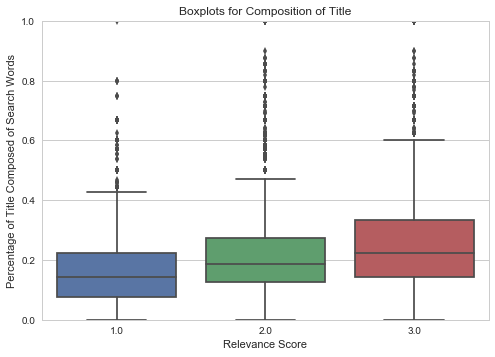

In [465]:
# Create boxplots for text field percentage for each text field.
ax = sns.boxplot(x="relevance_reduced", y="title_pct_prod", data=search)
ax.set(ylim=(0, 1.0))
plt.title('Boxplots for Composition of Title')
plt.xlabel('Relevance Score')
plt.ylabel('Percentage of Title Composed of Search Words')
plt.show()

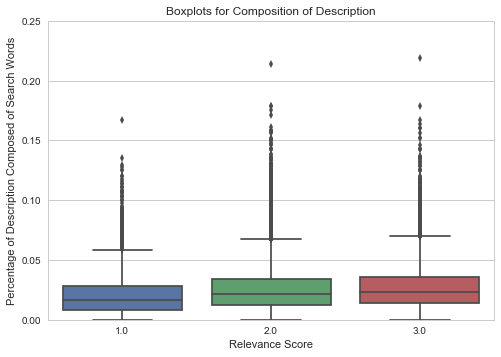

In [466]:
ax = sns.boxplot(x="relevance_reduced", y="desc_pct_prod", data=search)
ax.set(ylim=(0, 0.25))
plt.title('Boxplots for Composition of Description')
plt.xlabel('Relevance Score')
plt.ylabel('Percentage of Description Composed of Search Words')
plt.show()

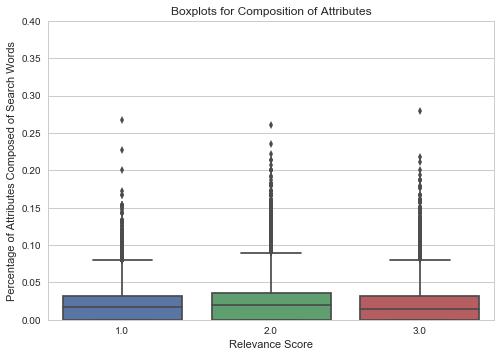

In [467]:
ax = sns.boxplot(x="relevance_reduced", y="att_pct_prod", data=search)
ax.set(ylim=(0, 0.4))
plt.title('Boxplots for Composition of Attributes')
plt.xlabel('Relevance Score')
plt.ylabel('Percentage of Attributes Composed of Search Words')
plt.show()

Examining the relationship between the percentage of the long text fields that contain a search word, we see less of a relationship with relevance score than we did with the previous collection of plots.  There does seem to be some positive correlation with the title, although less so than with the previous features.  The plots for description and attributes seem flat and do not show any obvious trends.

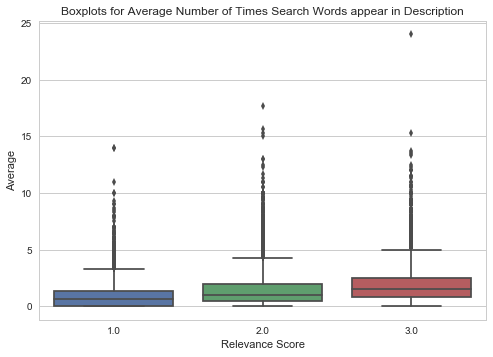

In [468]:
# Create boxplots for search term appearance stats.
ax = sns.boxplot(x="relevance_reduced", y="desc_avg", data=search)
plt.title('Boxplots for Average Number of Times Search Words appear in Description')
plt.xlabel('Relevance Score')
plt.ylabel('Average')
plt.show()

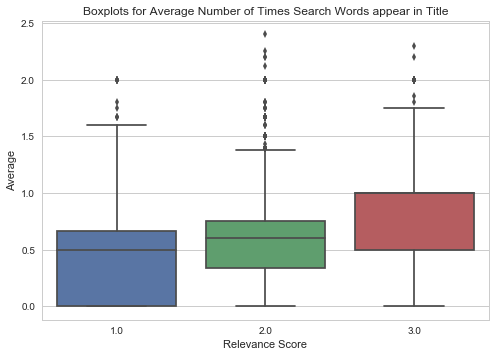

In [469]:
ax = sns.boxplot(x="relevance_reduced", y="title_avg", data=search)
plt.title('Boxplots for Average Number of Times Search Words appear in Title')
plt.xlabel('Relevance Score')
plt.ylabel('Average')
plt.show()

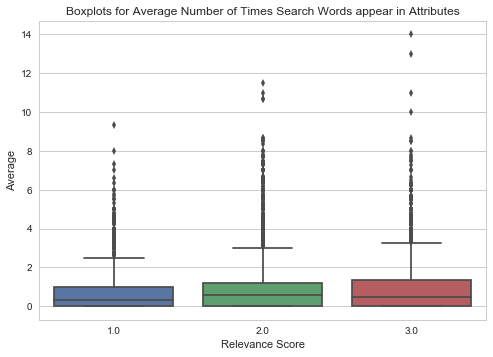

In [470]:
ax = sns.boxplot(x="relevance_reduced", y="att_avg", data=search)
plt.title('Boxplots for Average Number of Times Search Words appear in Attributes')
plt.xlabel('Relevance Score')
plt.ylabel('Average')
plt.show()

This next group of boxplots examine the connection between the average number of times a search word appears in a text field and relevance score.  Again, the title shows the most positive correlation with the description showing perhaps a weak positive correlation to be investigated further.  Once again, the attributes do not show much in the way of a relationship with relevance score.

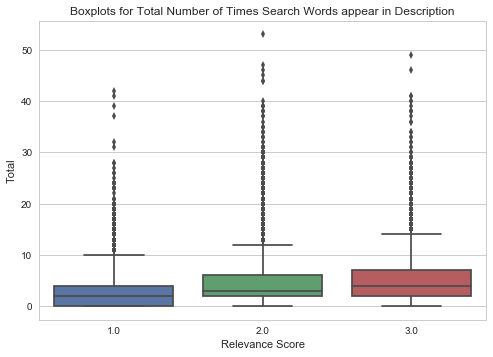

In [471]:
ax = sns.boxplot(x="relevance_reduced", y="desc_total", data=search)
plt.title('Boxplots for Total Number of Times Search Words appear in Description')
plt.xlabel('Relevance Score')
plt.ylabel('Total')
plt.show()

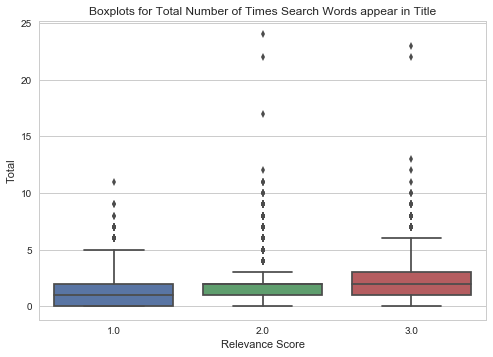

In [472]:
ax = sns.boxplot(x="relevance_reduced", y="title_total", data=search)
plt.title('Boxplots for Total Number of Times Search Words appear in Title')
plt.xlabel('Relevance Score')
plt.ylabel('Total')
plt.show()

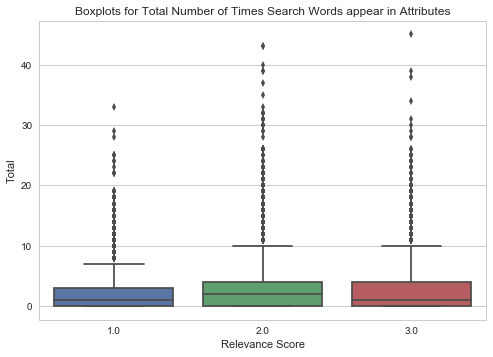

In [473]:
ax = sns.boxplot(x="relevance_reduced", y="att_total", data=search)
plt.title('Boxplots for Total Number of Times Search Words appear in Attributes')
plt.xlabel('Relevance Score')
plt.ylabel('Total')
plt.show()

In the above group of plots looking at the relationship between the total number of times a search word appears in a text field, all three groupings show little to no correlation.  

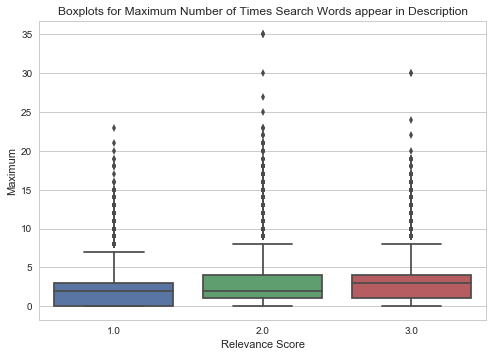

In [474]:
ax = sns.boxplot(x="relevance_reduced", y="desc_max", data=search)
plt.title('Boxplots for Maximum Number of Times Search Words appear in Description')
plt.xlabel('Relevance Score')
plt.ylabel('Maximum')
plt.show()

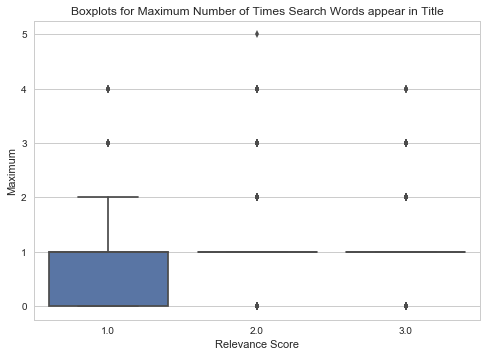

In [475]:
ax = sns.boxplot(x="relevance_reduced", y="title_max", data=search)
plt.title('Boxplots for Maximum Number of Times Search Words appear in Title')
plt.xlabel('Relevance Score')
plt.ylabel('Maximum')
plt.show()

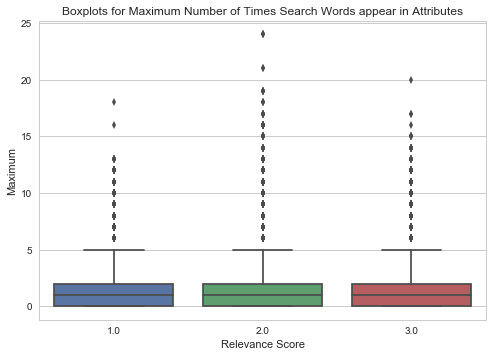

In [476]:
ax = sns.boxplot(x="relevance_reduced", y="att_max", data=search)
plt.title('Boxplots for Maximum Number of Times Search Words appear in Attributes')
plt.xlabel('Relevance Score')
plt.ylabel('Maximum')
plt.show()

This last group of boxplots looks at the relationship between the total number of times a search word appears in a text field.  Just as in the previous set, no obvious trends are present.

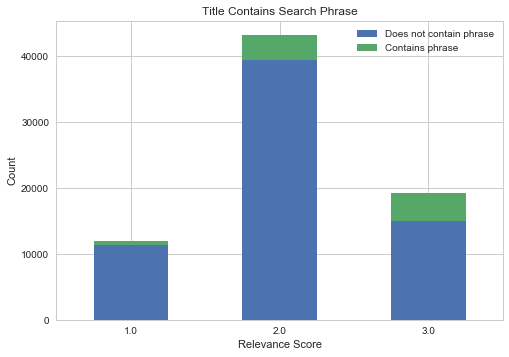

In [477]:
# Create stacked bar charts to compare text fields that contain the entire search phrase for each text field.
plt.clf()
ax = pd.crosstab(index=search.relevance_reduced, columns=search.title_phrase).plot(kind='bar', stacked=True, rot=0)
ax.legend(['Does not contain phrase', 'Contains phrase'])
plt.title('Title Contains Search Phrase')
plt.xlabel('Relevance Score')
plt.ylabel('Count')
plt.show()

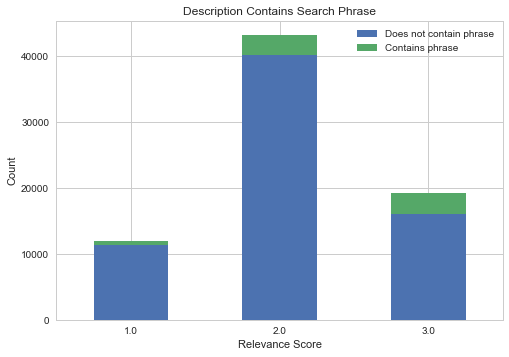

In [478]:
plt.clf()
ax = pd.crosstab(index=search.relevance_reduced, columns=search.desc_phrase).plot(kind='bar', stacked=True, rot=0)
ax.legend(['Does not contain phrase', 'Contains phrase'])
plt.title('Description Contains Search Phrase')
plt.xlabel('Relevance Score')
plt.ylabel('Count')
plt.show()

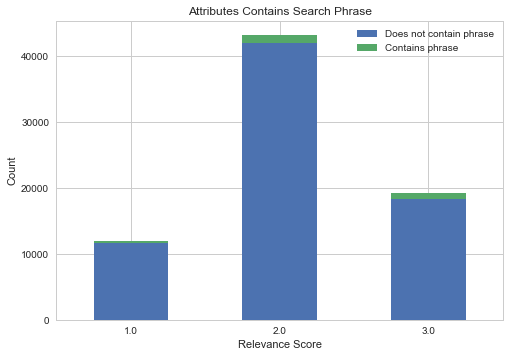

In [479]:
plt.clf()
ax = pd.crosstab(index=search.relevance_reduced, columns=search.att_phrase).plot(kind='bar', stacked=True, rot=0)
ax.legend(['Does not contain phrase', 'Contains phrase'])
plt.title('Attributes Contains Search Phrase')
plt.xlabel('Relevance Score')
plt.ylabel('Count')
plt.show()

This last set of visualizations are stacked bar plots to compare the fraction of search phrases that appear in our three text fields.  The three plots show varying degrees of an increase in the percentage as the relevance score increases, with title showing the most and attributes showing the least.  However, in all cases the number of cases with no search phrase present is much larger than those that do and so the effect that this will have on the final result is questionable.

To conclude, based on the above plottings, it seems like the title field is the one that has the most positive correlation with relevance score.  The attribute score did show much of a relationship with relevance at all.  Description displays some positive correlation, but not as consistently as title.

We will now perform statistical tests for the above findings.

In [480]:
from scipy import stats

# Set significance level for use throughout the testing
alpha = 0.05

In [481]:
# Read dataframe
search = pd.read_csv('search.csv')

In [482]:
# Segment the dataframe by relevance score
search_1 = search[search['relevance_reduced'] == 1]
search_2 = search[search['relevance_reduced'] == 2]
search_3 = search[search['relevance_reduced'] == 3]

In [483]:
# Create list of dataframe columns that will be tested
cols = ['title_pct', 'desc_pct', 'att_pct', 'title_pct_prod', 'desc_pct_prod', 'att_pct_prod',
       'title_avg', 'desc_avg', 'att_avg', 'title_total', 'desc_total', 'att_total',
       'title_max', 'desc_max', 'att_max'] 

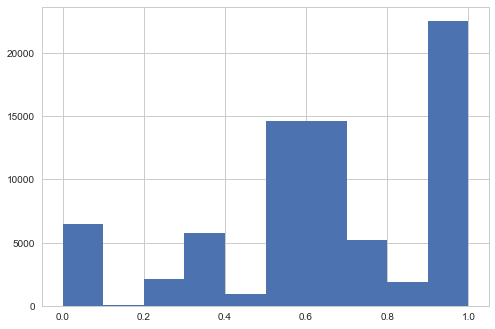

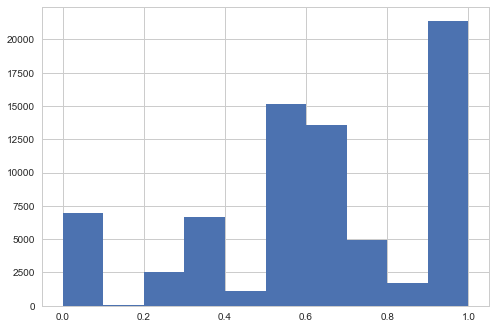

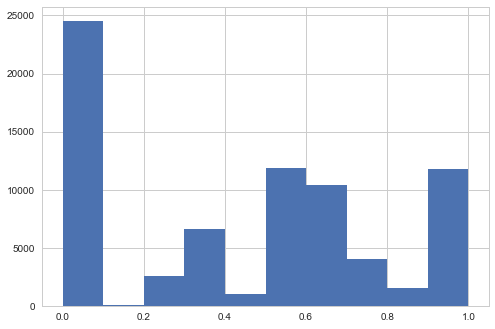

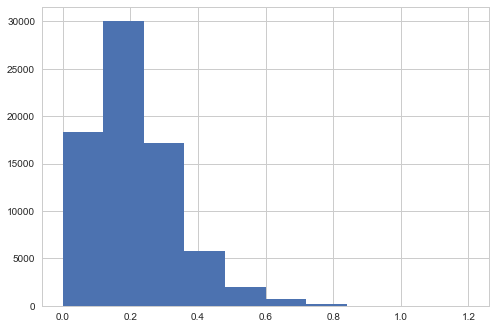

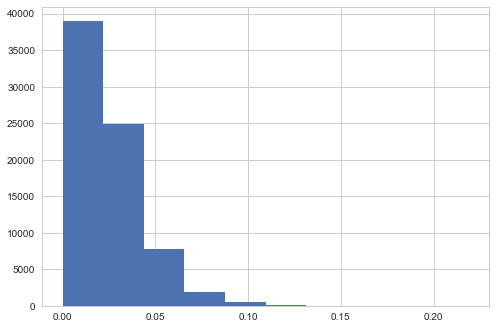

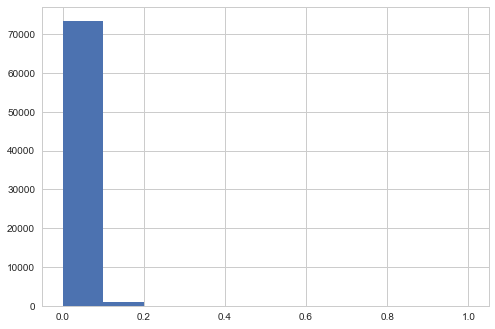

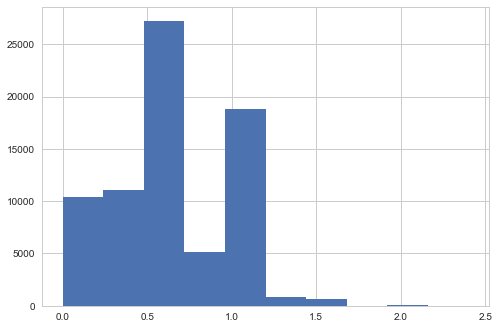

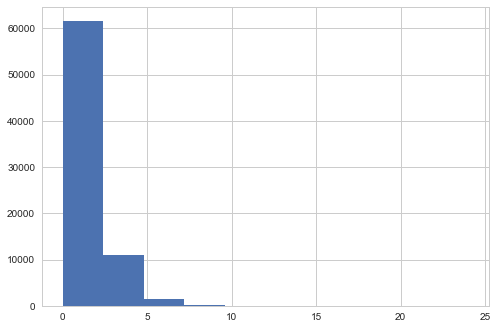

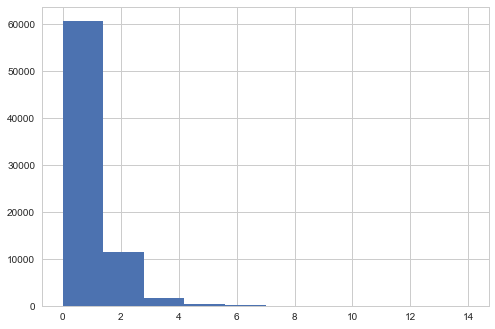

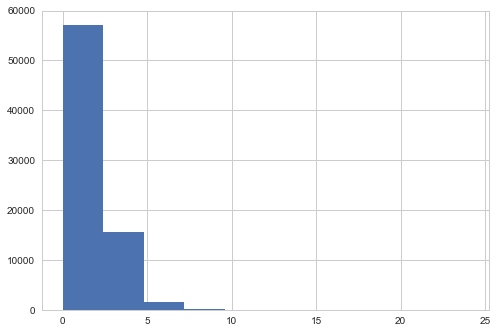

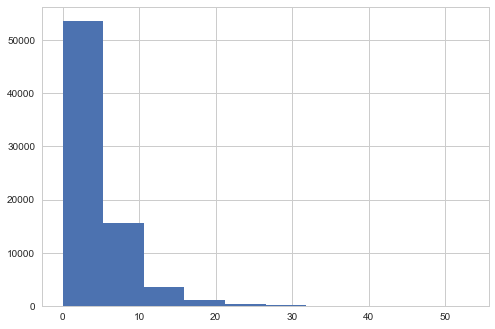

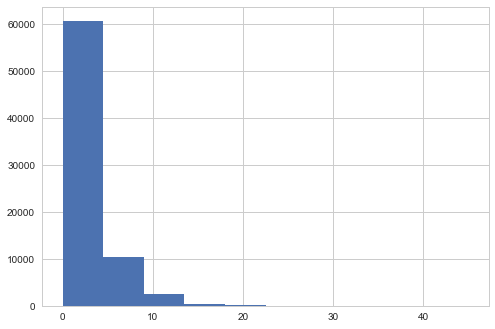

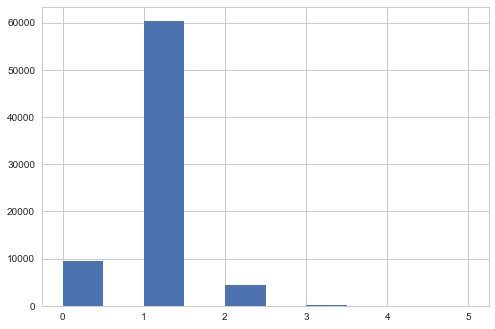

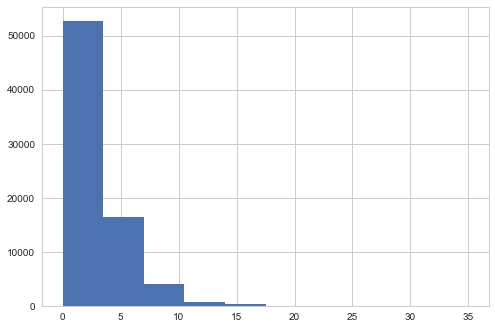

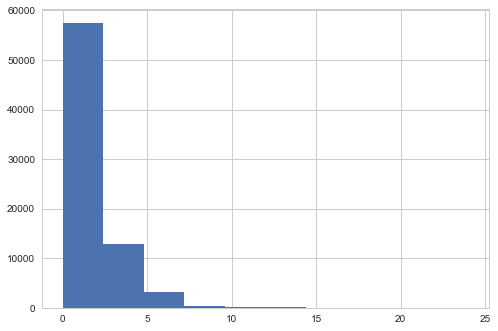

In [484]:
# Generate histograms for all columns
for col in cols:
    plt.hist(search[col])
    plt.show()

None of the distributions of the variables appear normal. Most are right skewed or multimodal. For this reason, we will use the nonparametric Kruskal-Wallis test for equality of distributions.

Null hypothesis: The distributions of the variables for the three relevance level are identical.
Alternative hypothesis: At least one of the variable has a distribution different from the other two.

In [485]:
# Perform the Kruskal-Wallis test for all the columns in the list cols
print('p-values by column for Kruskal-Wallis test')
for col in cols:
    s, p = stats.kruskal(search_1[col], search_2[col], search_3[col])
    print (f'{col}: {p:.2e}')

p-values by column for Kruskal-Wallis test
title_pct: 0.00e+00
desc_pct: 0.00e+00
att_pct: 5.71e-93
title_pct_prod: 0.00e+00
desc_pct_prod: 3.00e-271
att_pct_prod: 1.98e-123
title_avg: 0.00e+00
desc_avg: 0.00e+00
att_avg: 1.06e-114
title_total: 0.00e+00
desc_total: 0.00e+00
att_total: 5.37e-151
title_max: 0.00e+00
desc_max: 0.00e+00
att_max: 7.00e-133


All of the p-values are less than our predetermined significance level and therefore we can reject the null hypothesis for each column and conclude that the distributions of the variables differ by relevance score.

In the cases of some variables, the boxplots examined previously were very similar, so let's examine more closely the measures of central tendency for each variable.

In [486]:
# Calculate median for each variable and relevance score combination
for col in cols:
    print(col+' Medians:')
    print(f'Relevance 1: {np.median(search_1[col]):.2f}')
    print(f'Relevance 2: {np.median(search_2[col]):.2f}')
    print(f'Relevance 3: {np.median(search_3[col]):.2f}')
    print('')

title_pct Medians:
Relevance 1: 0.50
Relevance 2: 0.67
Relevance 3: 1.00

desc_pct Medians:
Relevance 1: 0.50
Relevance 2: 0.67
Relevance 3: 0.80

att_pct Medians:
Relevance 1: 0.33
Relevance 2: 0.50
Relevance 3: 0.50

title_pct_prod Medians:
Relevance 1: 0.14
Relevance 2: 0.19
Relevance 3: 0.22

desc_pct_prod Medians:
Relevance 1: 0.02
Relevance 2: 0.02
Relevance 3: 0.02

att_pct_prod Medians:
Relevance 1: 0.02
Relevance 2: 0.02
Relevance 3: 0.01

title_avg Medians:
Relevance 1: 0.50
Relevance 2: 0.60
Relevance 3: 1.00

desc_avg Medians:
Relevance 1: 0.67
Relevance 2: 1.00
Relevance 3: 1.50

att_avg Medians:
Relevance 1: 0.33
Relevance 2: 0.60
Relevance 3: 0.50

title_total Medians:
Relevance 1: 1.00
Relevance 2: 2.00
Relevance 3: 2.00

desc_total Medians:
Relevance 1: 2.00
Relevance 2: 3.00
Relevance 3: 4.00

att_total Medians:
Relevance 1: 1.00
Relevance 2: 2.00
Relevance 3: 1.00

title_max Medians:
Relevance 1: 1.00
Relevance 2: 1.00
Relevance 3: 1.00

desc_max Medians:
Relevance 1

We can see that for some of the variables, the median is consistent across all relevance scores. Let's now look at the means.

In [487]:
# Calculate mean for each variable and relevance score combination
for col in cols:
    print(col+' Means:')
    print(f'Relevance 1: {np.mean(search_1[col]):.2f}')
    print(f'Relevance 2: {np.mean(search_2[col]):.2f}')
    print(f'Relevance 3: {np.mean(search_3[col]):.2f}')
    print('')

title_pct Means:
Relevance 1: 0.48
Relevance 2: 0.63
Relevance 3: 0.80

desc_pct Means:
Relevance 1: 0.48
Relevance 2: 0.61
Relevance 3: 0.75

att_pct Means:
Relevance 1: 0.37
Relevance 2: 0.45
Relevance 3: 0.44

title_pct_prod Means:
Relevance 1: 0.15
Relevance 2: 0.20
Relevance 3: 0.24

desc_pct_prod Means:
Relevance 1: 0.02
Relevance 2: 0.03
Relevance 3: 0.03

att_pct_prod Means:
Relevance 1: 0.02
Relevance 2: 0.02
Relevance 3: 0.02

title_avg Means:
Relevance 1: 0.42
Relevance 2: 0.58
Relevance 3: 0.76

desc_avg Means:
Relevance 1: 0.95
Relevance 2: 1.38
Relevance 3: 1.76

att_avg Means:
Relevance 1: 0.58
Relevance 2: 0.77
Relevance 3: 0.79

title_total Means:
Relevance 1: 1.28
Relevance 2: 1.82
Relevance 3: 2.09

desc_total Means:
Relevance 1: 2.90
Relevance 2: 4.32
Relevance 3: 4.85

att_total Means:
Relevance 1: 1.85
Relevance 2: 2.57
Relevance 3: 2.35

title_max Means:
Relevance 1: 0.77
Relevance 2: 0.95
Relevance 3: 1.01

desc_max Means:
Relevance 1: 2.10
Relevance 2: 2.86
Rel

The means show more variablity across the three relevance scores, which is more consistent with the results of the Kruskal-Wallis tests. Most variables show a positive correlation with relevance score. The exceptions to this would be the variable related to the Attributes field. This would be consistent with the trends seen in the boxplots. Let's now look at correlation.

In [488]:
# Calculate correlation between each variable and relevance score
print('Correlation values:')
for col in cols:
    corr = np.corrcoef(search[col], search['relevance'])[0, 1]
    print(f'{col}: {corr:.3f}')

Correlation values:
title_pct: 0.355
desc_pct: 0.295
att_pct: 0.067
title_pct_prod: 0.228
desc_pct_prod: 0.122
att_pct_prod: -0.009
title_avg: 0.328
desc_avg: 0.213
att_avg: 0.082
title_total: 0.226
desc_total: 0.163
att_total: 0.057
title_max: 0.180
desc_max: 0.135
att_max: 0.026


The results show a positive correlation with almost every variable and relevance score. The weakest correlations (including the one negative correlation) are found in the variable related to Attributes. Again, this is consistent with previous results.

Let's now look at the boolean phrase values.

In [489]:
# Create list containing necessary columns
cols2 = ['title_phrase', 'desc_phrase', 'att_phrase']

In [490]:
# Print the proportion of observations where the search phrase appears in a text field for each relevance level.
for col in cols2:
    pct1 = sum(search_1[col] == 1) / len(search_1[col])
    pct2 = sum(search_2[col] == 1) / len(search_2[col])
    pct3 = sum(search_3[col] == 1) / len(search_3[col])
    
    print(col+':')
    print(f'Relevance 1: {pct1:.3f}')
    print(f'Relevance 2: {pct2:.3f}')
    print(f'Relevance 3: {pct3:.3f}')
    print('')

title_phrase:
Relevance 1: 0.052
Relevance 2: 0.088
Relevance 3: 0.219

desc_phrase:
Relevance 1: 0.049
Relevance 2: 0.068
Relevance 3: 0.166

att_phrase:
Relevance 1: 0.023
Relevance 2: 0.027
Relevance 3: 0.049



We see the proportion increase across all three variables. Again, the weakest effect is seen within the Attributes field. Let's now test the significance of these results with pairwise tests.

Null hypothesis: The two proportions are equal.
Alternative hypothesis: The two proportions are not equal.

In [491]:
# Define function that will perform proportion test on each pair of proportions.
from statsmodels.stats.proportion import proportions_ztest

def prop_test(column):
    s12, p12 = proportions_ztest([sum(search_1[column] == 1), sum(search_2[column] == 1)]
                               , [len(search_1[column]), len(search_2[column])])
    s13, p13 = proportions_ztest([sum(search_1[column] == 1), sum(search_3[column] == 1)]
                               , [len(search_1[column]), len(search_3[column])])
    s23, p23 = proportions_ztest([sum(search_2[column] == 1), sum(search_3[column] == 1)]
                               , [len(search_2[column]), len(search_3[column])])
    return (p12, p13, p23)

In [492]:
# Perform the test for each of the three variables.
title_p1, title_p2, title_p3 = prop_test('title_phrase')
print('p-values for pairwise tests for title phrase:')
print(f'Relevance Scores 1 and 2: {title_p1:.2e}')
print(f'Relevance Scores 1 and 3: {title_p2:.2e}')
print(f'Relevance Scores 2 and 3: {title_p3:.2e}')

p-values for pairwise tests for title phrase:
Relevance Scores 1 and 2: 6.91e-38
Relevance Scores 1 and 3: 0.00e+00
Relevance Scores 2 and 3: 0.00e+00


In [493]:
desc_p1, desc_p2, desc_p3 = prop_test('desc_phrase')
print('p-values for pairwise tests for description phrase:')
print(f'Relevance Scores 1 and 2: {desc_p1:.2e}')
print(f'Relevance Scores 1 and 3: {desc_p2:.2e}')
print(f'Relevance Scores 2 and 3: {desc_p3:.2e}')

p-values for pairwise tests for description phrase:
Relevance Scores 1 and 2: 1.33e-14
Relevance Scores 1 and 3: 2.52e-208
Relevance Scores 2 and 3: 0.00e+00


In [494]:
att_p1, att_p2, att_p3 = prop_test('att_phrase')
print('p-values for pairwise tests for attribute phrase:')
print(f'Relevance Scores 1 and 2: {att_p1:.2e}')
print(f'Relevance Scores 1 and 3: {att_p2:.2e}')
print(f'Relevance Scores 2 and 3: {att_p3:.2e}')

p-values for pairwise tests for attribute phrase:
Relevance Scores 1 and 2: 2.26e-02
Relevance Scores 1 and 3: 6.29e-30
Relevance Scores 2 and 3: 2.27e-44


In all cases, the p-values are well below our predetermined level of significance and we can reject the null hypothesis that the proportions are equal.

To conclude, the above testing show that our numerical variables do have different distributions across the three relevance levels and that many of them do show evidence of a positive correlation with relevance score. The variables that are exceptions are the ones related to the Attributes field.

## Machine Learning

In [495]:
# Import prepared training file
search = pd.read_csv('search.csv')

In [496]:
# Only use numeric fields.
search_numeric = search.select_dtypes(['number'])

In [497]:
# Drop id related columns.
search_numeric = search_numeric.drop(['Unnamed: 0', 'id', 'product_uid', 'relevance_reduced'], axis=1)

In [498]:
search_numeric.head()

,relevance,desc_pct,title_pct,att_pct,desc_pct_prod,title_pct_prod,att_pct_prod,desc_phrase,title_phrase,att_phrase,...,att_avg,desc_total,title_total,att_total,desc_max,title_max,att_max,search_split,title_split,desc_split
0,3.00,0.500000,0.500000,0.500000,0.011628,0.250000,0.018868,0,0,0,...,0.500000,3,1,1,3,1,1,2,4,86
1,2.50,0.500000,0.500000,0.500000,0.011628,0.250000,0.018868,0,0,0,...,0.000000,0,0,0,0,0,0,2,4,86
2,3.00,1.000000,1.000000,1.000000,0.008197,0.100000,0.008621,1,1,1,...,0.000000,0,0,0,0,0,0,1,10,122
3,2.33,0.333333,0.333333,0.666667,0.014706,0.083333,0.027397,0,0,0,...,0.666667,1,1,2,1,1,1,3,12,68
4,2.67,1.000000,1.000000,1.000000,0.029412,0.166667,0.027397,1,0,0,...,1.000000,2,2,2,1,1,1,2,12,68


In [499]:
# Separate dependent and independent variables.
X_search = search_numeric.drop(['relevance'], axis=1)
y_search = search_numeric['relevance']

In [500]:
from sklearn.model_selection import train_test_split

# Split into train and test sets. k
X_train, X_test, y_train, y_test = train_test_split(X_search, y_search, test_size=0.3, random_state=44)

In [501]:
# Create dictionary that will store results of models.
rsme = {}

In [502]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt

# Initiate scaler.
scale = StandardScaler()

# Initiate regressor.
lr = LinearRegression()

# Create pipeline.
pl = Pipeline(steps=[('scale', scale), ('linreg', lr)])

# Create grid of parameters for tuning.
parameters_lr = {'linreg__fit_intercept':[True,False], 'linreg__normalize':[True,False], 'linreg__copy_X':[True, False]}

# Tune parameters.
grid_lr = GridSearchCV(pl, parameters_lr, cv=10)

# Fit model to training data.
grid_lr.fit(X_train, y_train)

# Generate predictions using the test set.
preds_lr = grid_lr.predict(X_test)

rsme['Linear Regression'] = sqrt(mean_squared_error(y_test, preds_lr))

In [503]:
# Lasso Regression

from sklearn.linear_model import Lasso

scale = StandardScaler()
lasso = Lasso()

pl = Pipeline(steps=[('scale', scale), ('lasso', lasso)])

parameters_lasso = {'lasso__alpha': [0.001, 0.01, 0.1], 'lasso__normalize':[True, False]}
grid_lasso = GridSearchCV(pl, parameters_lasso, cv=10)

grid_lasso.fit(X_train, y_train)

preds_lasso = grid_lasso.predict(X_test)

rsme['Lasso Regression'] = sqrt(mean_squared_error(y_test, preds_lasso))

In [504]:
# Ridge Regression

from sklearn.linear_model import Ridge

scale = StandardScaler()
ridge = Ridge()

pl = Pipeline(steps=[('scale', scale), ('ridge', ridge)])

parameters_ridge = {'ridge__alpha': [0.001, 0.01, 0.1], 'ridge__normalize':[True, False]}
grid_ridge = GridSearchCV(pl, parameters_ridge, cv=10)

grid_ridge.fit(X_train, y_train)

preds_ridge = grid_ridge.predict(X_test)

rsme['Ridge Regression'] = sqrt(mean_squared_error(y_test, preds_ridge))

In [505]:
# Random Forest Regression

from sklearn.ensemble import RandomForestRegressor

scale = StandardScaler()
rf = RandomForestRegressor(random_state=0)

pl = Pipeline(steps=[('scale', scale), ('rf', rf)])

parameters_rf = {'rf__n_estimators':[10, 15, 20], 'rf__max_depth':[4, 6, 8]}
grid_rf = GridSearchCV(pl, parameters_rf, cv=10)

grid_rf.fit(X_train, y_train)

preds_rf = grid_rf.predict(X_test)

rsme['Random Forest Regression'] = sqrt(mean_squared_error(y_test, preds_rf))

In [506]:
# SVM Regression (Grid Search omitted due to lenghty runtime)
from sklearn.svm import SVR

scale = StandardScaler()
svm = SVR()

pl = Pipeline(steps=[('scale', scale), ('svm', svm)])

pl.fit(X_train, y_train)

preds_svm = pl.predict(X_test)

rsme['SVM Regression'] = sqrt(mean_squared_error(y_test, preds_svm))

In [507]:
rsme

{'Lasso Regression': 0.4887519883597523,
 'Linear Regression': 0.48868208431341914,
 'Random Forest Regression': 0.4801124347210643,
 'Ridge Regression': 0.488690649845203,
 'SVM Regression': 0.4870078570617452}

In [508]:
import operator

# Find model with the lowest rsme value.
best_model = min(rsme.items(), key=operator.itemgetter(1))[0]

print(f'The model with the lowest RSME value was {best_model}.')
print(f'RSME: {rsme[best_model]:.3f}')

The model with the lowest RSME value was Random Forest Regression.
RSME: 0.480


In [509]:
# Try to improve model through bagging.
from sklearn.ensemble import BaggingRegressor

bag = BaggingRegressor(grid_rf, n_estimators=50, max_samples=0.1)

bag.fit(X_train, y_train)

preds = bag.predict(X_test)

sqrt(mean_squared_error(y_test, preds))

0.4801547956748359

The Bagging Regressor did not improve the results.

In [510]:
# Import full test set.
test = pd.read_csv('test.csv')

In [511]:
# Perform same cleaning steps as above.
test_numeric = test.select_dtypes(['number'])
test_numeric = test_numeric.drop(['Unnamed: 0', 'id', 'product_uid'], axis=1)

In [512]:
# Fit chosen model to provided test set.
scale = StandardScaler()
rf = RandomForestRegressor(random_state=0)

pl = Pipeline(steps=[('scale', scale), ('rf', rf)])

parameters_rf = {'rf__n_estimators':[10, 15, 20], 'rf__max_depth':[4, 6, 8]}
grid_rf = GridSearchCV(pl, parameters_rf, cv=10)

grid_rf.fit(X_search, y_search)

preds_rf = grid_rf.predict(test_numeric)

In [514]:
# Prepare submission file for Kaggle.
submit = pd.DataFrame({'id':test['id'], 'relevance':preds_rf})
submit = submit.drop_duplicates(['id'])
submit.to_csv(r'submission.csv', index=False)

The Kaggle submission gives a score of .48614. This is consistent with the results above and the model translates well to unseen data.